



**DATASET FOR CLASSIFICATION HAVING CLASS AS CONTINUOUS ATTRIBUTE.**
# Boston Housing Dataset

This dataset is collected from uci and the link to data is:
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

***About Dataset***- In this dataset we are given records of Boston city's suburbs or towns.We are given different attribute related to each town's some properties like crime rate,average number of rooms etc,and we have to predict the median value of houses in a particular town using these attributes of different different towns.


This dataset contain following attributes:

'CRIM' - per capita crime rate by town

'ZN' - proportion of residential land zoned for lots over 25,000 sq.ft.

'INDUS' - proportion of non-retail business acres per town.

'CHAS' - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

'NOX' - nitric oxides concentration 

'RM' - average number of rooms per dwelling

'AGE' - proportion of owner-occupied units built prior to 1940

'DIS' - weighted distances to five Boston employment centres

'RAD' - index of accessibility to radial highways

'TAX' - full-value property-tax rate per $10,000

'PTRATIO' - pupil-teacher ratio by town

'B' - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
by town

'LSTAT' - % lower status of the population

'MEDV' - Median value of owner-occupied homes in $1000's. 
**Prediction class**.  

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import StrMethodFormatter

**since dataset is present in the form of (n,1) format where n is the number of rows and have only one column,which contains all the features,so naming the features is too important.**


In [ ]:
#Reading and naming the attribute.
col_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('house.csv', delimiter=r'\s+', names=col_name)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
#Finding nominal attributes
data.dtypes[data.dtypes=='object']

Series([], dtype: object)

There is no nominal attribute.

In [ ]:
data.dtypes


CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [ ]:
print(np.unique(data['CHAS']).shape)
print(np.unique(data['RAD']).shape)

(2,)
(9,)


Now we can see 
'**CHAS**' is ***Binary*** and ***Categorical*** attribute 

'**RAD**'  is ***Ordinal*** attribute as it is measurement of accesibility of house for radial highways

Rest all are ***Continuous*** and ***Ratio*** attributes.


In [ ]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

As we can see above,there are no missing values.

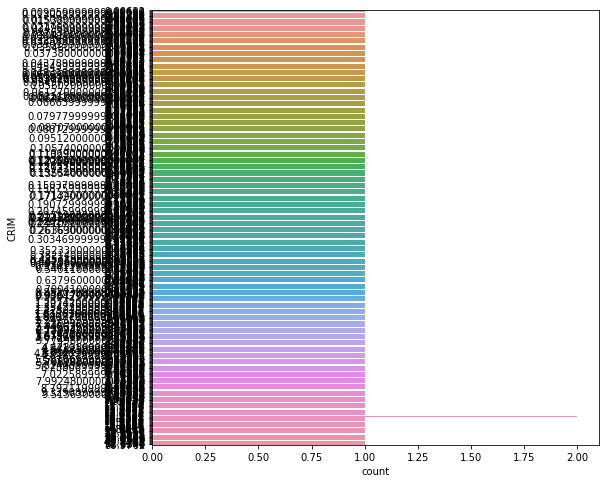

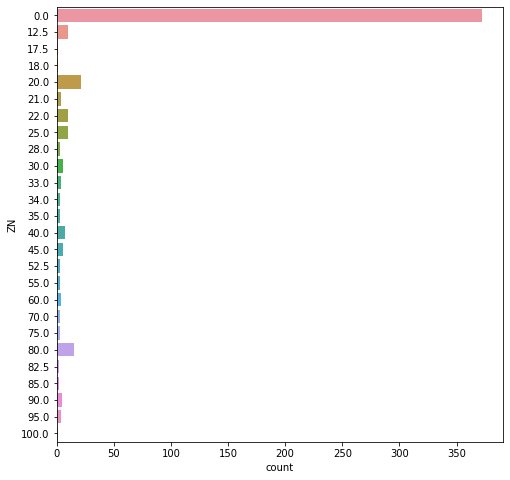

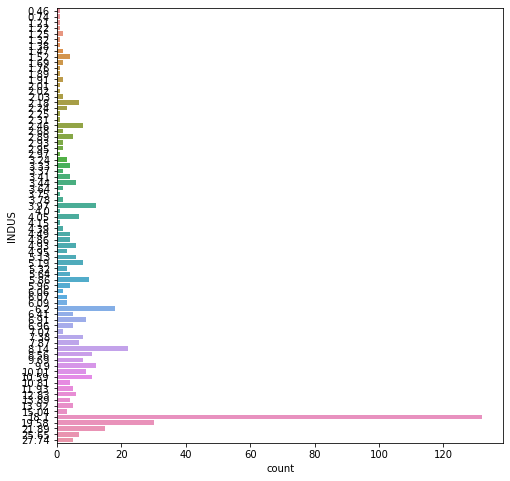

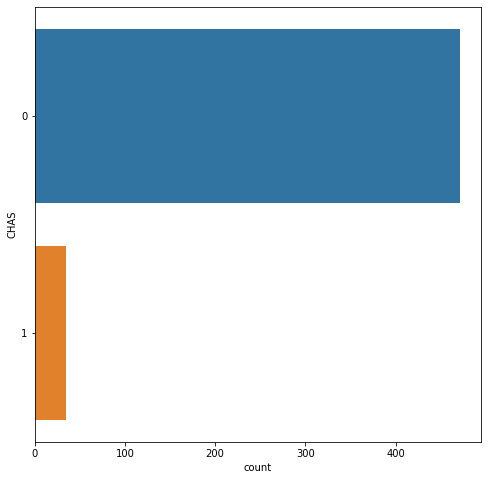

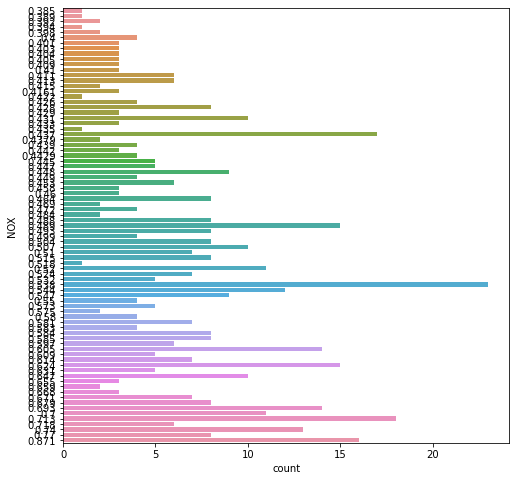

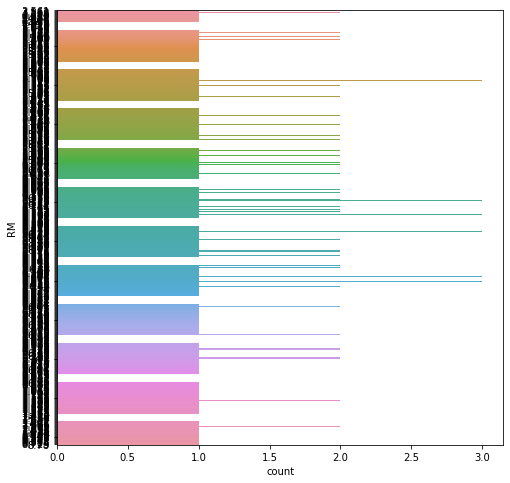

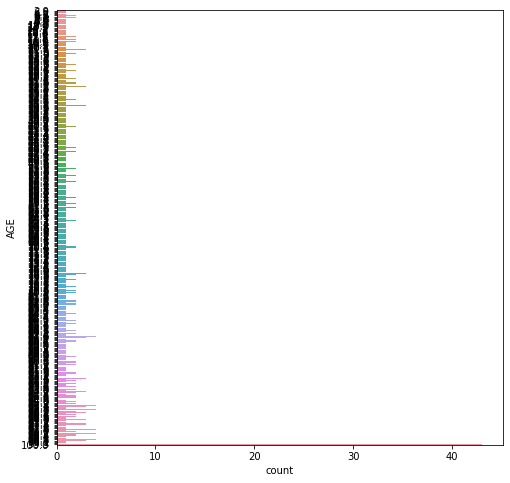

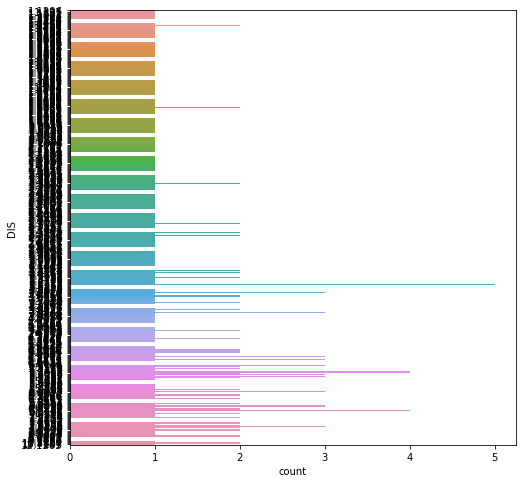

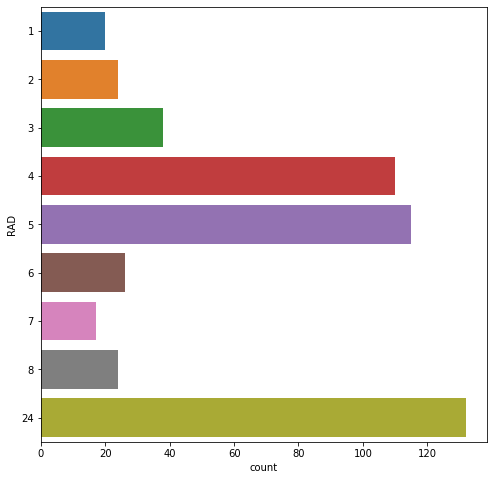

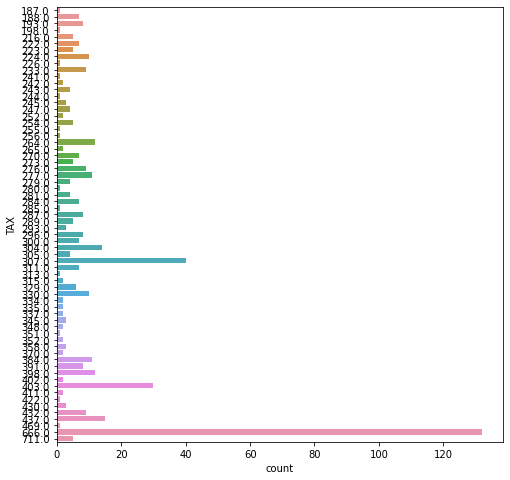

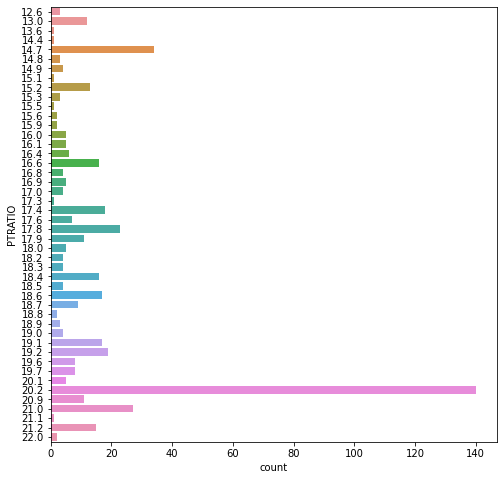

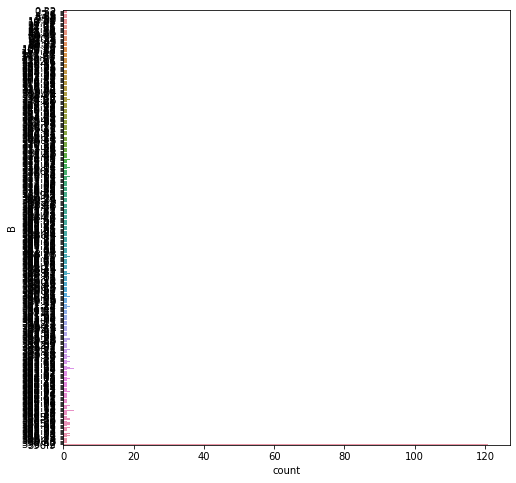

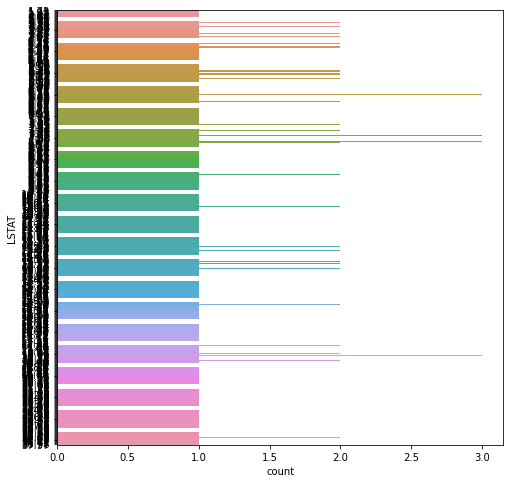

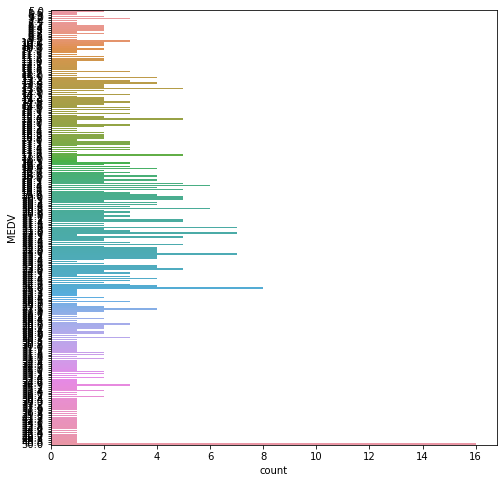

In [ ]:
#Plotting box plots for all attributes.
for i in col_name:
  plt.figure(figsize=(8,8))
  sns.countplot(y=i, data=data)

**Dropping ZN attribute because we can see from above boxplot that 0.0 is present maximum time,so we can drop this attribute.**

**Similarly Dropping CHAS attribute becuase 0 is present mostly, and it is not contributing much **

In [ ]:
#Dropping ZN and CHAS
data = data.drop(['ZN'], axis=1)
data = data.drop(['CHAS'], axis=1)

In [ ]:
#finding pearson coefficient.
corr=data.corr()
corr

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
INDUS,0.406583,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
NOX,0.420972,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,0.595129,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,0.720760,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
PTRATIO,0.289946,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787
B,-0.385064,-0.356977,-0.380051,0.128069,-0.273534,0.291512,-0.444413,-0.441808,-0.177383,1.000000,-0.366087,0.333461


**getting pairs having correlation greater than absolute(0.9)**

In [ ]:
count=0
col_name=data.columns
for i in range(0,col_name.shape[0]):
  for j in range(0,i):
    if(corr[col_name[i]][col_name[j]]>=0.900 or corr[col_name[i]][col_name[j]]<=-0.900  ):
      print(col_name[i],'vs',col_name[j],corr[col_name[i]][col_name[j]])
      count=count+1
print(count)        

TAX vs RAD 0.9102281885331822
1


# **Applying PCA as dimensional reduction technique.**



In [ ]:
from sklearn.decomposition import PCA
features=['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
# Separating out the non-class attributes
data_NN = data.loc[:, features].values
print(data_NN.shape)
data_NN = StandardScaler().fit_transform(data_NN)
print(data_NN.shape)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_NN)
print(pca.components_)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2',])
print(principalDf)

(506, 11)
(506, 11)
[[ 0.26836742  0.3557288   0.35227471 -0.19315804  0.31693719 -0.32117898
   0.33866105  0.3587725   0.20722977 -0.21654542  0.32121368]
 [-0.22696676  0.13476958  0.33545841  0.3707247   0.37728216 -0.42182773
  -0.1917767  -0.14991611 -0.52488031  0.1049177  -0.11963873]]
     principal component 1  principal component 2
0                -2.099934               1.151435
1                -1.648604               0.320681
2                -2.279878               0.566395
3                -2.825984              -0.287707
4                -2.668947              -0.134753
..                     ...                    ...
501              -0.487356               0.378369
502              -0.281127               0.284837
503              -0.491600               1.010136
504              -0.446941               0.827462
505              -0.297323               0.268764

[506 rows x 2 columns]


**we have saw above that the number of components required for acheiving ~ 0.99 variance is 10 components.And we have already know this from correlation as one pair is highly correlated,so they can be dropped.**





# ***Transforming the attributes for having the normal distribution.***
**Key points about my transformation -:**

1)I am using kurtosis as my parameter for judging how much my attribute is in normal distribution form,and setting **kurtosis value =3** as standard

2) I have performed following four transformation on each attribute and keep that transformation which have maximum proximity to kurtosis value=3.

    a.) Reciprocol Transformation.
    b.) BOX-COX Transformation
    c.) Logarithm Transformation- 'Variating the base of log and selecting best base which give kurtosis value most near to 3'
    d.) Power Transformation - 'Variating the power of power function and selecting best power which give kurtosis value most near to 3'

In [ ]:
from scipy.stats import norm, kurtosis, boxcox
for col in col_name:
 print("for attribute",col, "\n") 
 n=0
 min_kurto=kurtosis(data[col],fisher=False)
 print("Kurtosis on attribute before transforming it into any normal curve",min_kurto,"\n")
 
 # 1.)reciprocol transformation
 data_copy=data.copy()
 data_copy[col]=1/(data_copy[col])
 re_kur=kurtosis(data_copy[col],fisher= False)
 print("\n Kurtosis of after reciprocol transformation",re_kur,'\n')
 if(abs(3-re_kur)<abs(3-min_kurto)):
   n=1
   min_kurto=re_kur
 
 
 
 # 2.)BOX-COX transformation
 data_copy=data.copy()
 data_copy[col]=boxcox(data_copy[col])[0]
 bc_kur=kurtosis(data_copy[col],fisher= False)
 print("\nKurtosis after BOX-COX transformation",bc_kur,"\n")
 if(abs(3-bc_kur)<abs(3-min_kurto)):
   n=2
   min_kurto=bc_kur
 
 
 # 3.) variating 'bases' of log
 exp= 1.001
 data_copy=data.copy()
 data_copy[col]=(np.log(data_copy[col]))/np.log(exp)
 res=kurtosis(data_copy[col],fisher=False)
 exponent=exp
 for i in range(0,1000):
  exp=exp+0.001
  data_copy=data.copy()
  data_copy[col]=(np.log(data_copy[col]))/np.log(exp)
  l=kurtosis(data_copy[col],fisher=False)
  if(abs(3.0-l)<abs(3.0-res)):
    res=l
    exponent=exp
  
 print("\nso the best kurtosis value and best value for base after Log transformation is: 'kurtosis'=",res,",base=",exponent,"\n")
 
 if(abs(3-res)<abs(3-min_kurto)):
   n=3
   min_kurto=res
   base=exponent
 
 
 # 4.) variating 'powers' of power function
 exp= 0.1
 data_copy=data.copy()
 data_copy[col]=np.power(data_copy[col],exp)
 res=kurtosis(data_copy[col],fisher=False)
 exponent=exp
 for i in range(0,1000):
  exp=exp+0.1
  data_copy=data.copy()
  data_copy[col]=np.power(data_copy[col],exp)
  l=kurtosis(data_copy[col],fisher=False)
  if(abs(3.0-l)<abs(3.0-res)):
    res=l
    exponent=exp
 
 print("so the kurtosis value and best value for power after power transformation is: 'kurtosis'=",res,",power=",exponent,"\n")
 
 if(abs(3-res)<abs(3-min_kurto)):
   n=4
   min_kurto=res
   power=exponent
 
 
 #finally transforming the attribute 'A'
 if(n==1):
   data[col]=1/(data[col])
 if(n==2):
   data[col]=boxcox(data[col])[0]
 if(n==3):
   data[col]=(np.log(data[col]))/np.log(base)
 if(n==4):
   data[col]=np.power(data[col],power)
 
 print("\nSo best kurtosis value after applying suitable best possible transform on attribute",col, "kurtosis= ",kurtosis(data[col],fisher=False),"\n")
 
 print("\n################################\n\n")
 
 




for attribute CRIM 

Kurtosis on attribute before transforming it into any normal curve 39.75278626142281 


 Kurtosis of after reciprocol transformation 23.99026868910725 


Kurtosis after BOX-COX transformation 1.9292751869950195 


so the best kurtosis value and best value for base after Log transformation is: 'kurtosis'= 1.9884178410035642 ,base= 1.035999999999996 



/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1018: RuntimeWarning: overflow encountered in square
  s = s**2
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:151: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1014: RuntimeWarning: overflow encountered in square
  s = a_zero_mean**2


so the kurtosis value and best value for power after power transformation is: 'kurtosis'= 2.9087949061907454 ,power= 0.2 


So best kurtosis value after applying suitable best possible transform on attribute CRIM kurtosis=  2.9087949061907454 


################################


for attribute INDUS 

Kurtosis on attribute before transforming it into any normal curve 1.7667815284370625 


 Kurtosis of after reciprocol transformation 39.92920926810722 


Kurtosis after BOX-COX transformation 1.8031732447429691 


so the best kurtosis value and best value for base after Log transformation is: 'kurtosis'= 2.704632505678916 ,base= 1.3049999999999664 

so the kurtosis value and best value for power after power transformation is: 'kurtosis'= 3.0434750779684423 ,power= 1.9000000000000006 


So best kurtosis value after applying suitable best possible transform on attribute INDUS kurtosis=  3.0434750779684423 


################################


for attribute NOX 

Kurtosis on attribute befor

In [ ]:
data.describe()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,5.060000e+02,506.000000,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,506.000000
mean,0.942647,129.021293,0.524164,6.284634,2.418218e+26,2.840450,1.600276,1.317144e+27,1.558509e+15,1.069031e+24,7.429295,2.503686
std,0.435896,124.968031,0.120891,0.702617,3.346157e+26,1.256261,0.665761,2.182272e+27,1.332931e+15,4.887850e+23,3.379637,0.302876
min,0.363198,0.228686,0.349951,3.561000,1.747322e+06,1.102401,0.000000,1.836740e+22,9.646559e+12,2.499740e-05,1.550375,1.620657
25%,0.606471,22.846411,0.414449,5.885500,2.097294e+22,1.810524,1.258874,9.266617e+23,4.349919e+14,8.761035e+23,4.716143,2.340593
50%,0.761758,74.819565,0.505662,6.208500,3.204918e+25,2.540550,1.439431,4.802160e+24,1.267510e+15,1.293559e+24,6.987190,2.499774
75%,1.297480,245.238862,0.595255,6.623500,4.384396e+26,3.732728,2.559899,4.677862e+27,2.530149e+15,1.448303e+24,9.625831,2.626528
max,2.453888,551.953216,0.859053,8.780000,1.000000e+27,7.361874,2.559899,8.878142e+27,6.927677e+15,1.471412e+24,18.346468,3.233635


In [ ]:
#finding pearson coefficient
corr=data.corr()
corr

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,0.635052,0.750969,-0.302069,0.611942,-0.659317,0.824233,0.802071,0.430040,-0.487472,0.625451,-0.563045
INDUS,0.635052,1.000000,0.726243,-0.349365,0.604956,-0.681368,0.473530,0.658965,0.392885,-0.398671,0.572087,-0.486254
NOX,0.750969,0.726243,1.000000,-0.301794,0.635935,-0.782278,0.582974,0.586580,0.312382,-0.422692,0.594105,-0.491557
RM,-0.302069,-0.349365,-0.301794,1.000000,-0.296225,0.215484,-0.197848,-0.250167,-0.313152,0.172499,-0.626906,0.659446
AGE,0.611942,0.604956,0.635935,-0.296225,1.000000,-0.590773,0.400134,0.447968,0.332297,-0.276249,0.584920,-0.431047
DIS,-0.659317,-0.681368,-0.782278,0.215484,-0.590773,1.000000,-0.495984,-0.515714,-0.304085,0.313312,-0.515139,0.332321
RAD,0.824233,0.473530,0.582974,-0.197848,0.400134,-0.495984,1.000000,0.785419,0.347985,-0.374886,0.453614,-0.396367
TAX,0.802071,0.658965,0.586580,-0.250167,0.447968,-0.515714,0.785419,1.000000,0.434139,-0.385650,0.512397,-0.496174
PTRATIO,0.430040,0.392885,0.312382,-0.313152,0.332297,-0.304085,0.347985,0.434139,1.000000,-0.171118,0.408947,-0.491675
B,-0.487472,-0.398671,-0.422692,0.172499,-0.276249,0.313312,-0.374886,-0.385650,-0.171118,1.000000,-0.347728,0.315972


In [ ]:
count=0
col_name=data.columns
for i in range(0,col_name.shape[0]):
  for j in range(0,i):
    if(corr[col_name[i]][col_name[j]]>=0.900 or corr[col_name[i]][col_name[j]]<=-0.900  ):
      print(col_name[i],'vs',col_name[j],corr[col_name[i]][col_name[j]])
      count=count+1
print(count)        

0


**Previously the 'TAX' and 'RAD' was having 0.91 correlation but now it has 0.78 correlation which is the change because we have transformed 'TAX' using power function and 'RAD' using Box-Cox Transformation.**

In [ ]:
from sklearn.decomposition import PCA
features=['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
# Separating out the non-class attributes
data_NN = data.loc[:, features].values
data_NN = StandardScaler().fit_transform(data_NN)
for i in range(1,12):
  pca = PCA(n_components=i)
  principalComponents = pca.fit_transform(data_NN)
  print('For no of components = ',i,' ',(pca.explained_variance_ratio_).sum(),'\n')
#principalDf = pd.DataFrame(data = principalComponents
#             , columns = ['principal component 1', 'principal component 2',])
print((pca.explained_variance_ratio_).sum())

For no of components =  1   0.5427994309739406 

For no of components =  2   0.6479141561794538 

For no of components =  3   0.7308740771978018 

For no of components =  4   0.8036771388515277 

For no of components =  5   0.8607272728200964 

For no of components =  6   0.9016433984318694 

For no of components =  7   0.9356474645527498 

For no of components =  8   0.9593268145866934 

For no of components =  9   0.9773598669266399 

For no of components =  10   0.9903291307209561 

For no of components =  11   0.9999999999999998 

0.9999999999999998


**As we can see we are still getting 0.99 variance from 10 components,so there is still no big effect in variance**

# Discretization features using Decision Tree Regressor(because attribute class 'MEDV' is continuous). MSE was used as criterion for discretization

In [ ]:
#Discretization using Regressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import array
original_data=data.copy()
discrete_sets=[]
for i in features:
  X = data[[i]].values                          
  y = data['MEDV'].values                             
  sort_idx = X.flatten().argsort()                  
  X = X[sort_idx]
  y = y[sort_idx]

  disc = DecisionTreeRegressor(criterion='mse',max_depth=3)              
  disc.fit(X, y)
  discrete_sets.append(disc)
  data['disc_'+ str(i)]=disc.predict(data[i].to_frame())
  original_data['disc_'+ str(i)]=data['disc_'+ str(i)]
  data = data.drop([i], axis=1)


In [ ]:
data.head()

,MEDV,disc_CRIM,disc_INDUS,disc_NOX,disc_RM,disc_AGE,disc_DIS,disc_RAD,disc_TAX,disc_PTRATIO,disc_B,disc_LSTAT
0,2.594558,2.815676,2.779443,2.443467,2.599928,2.595612,2.594385,2.655453,2.559112,2.658371,2.457049,2.704387
1,2.513831,2.647224,2.693366,2.657228,2.437494,2.468660,2.594385,2.655453,2.688237,2.658371,2.457049,2.592186
2,2.898003,2.647224,2.693366,2.657228,2.833510,2.595612,2.594385,2.655453,2.688237,2.658371,2.607929,2.947137
3,2.864995,2.647224,2.779443,2.657228,2.833510,2.595612,2.594385,2.655453,2.688237,2.559459,2.607929,3.104374
4,2.935030,2.647224,2.779443,2.657228,2.833510,2.595612,2.594385,2.655453,2.688237,2.559459,2.457049,2.704387


# Charts for showing bins and their discretized value for each attribute

The new discretized attribute for original attribute is represented by :

"disc_+(attribute name of original attribute)"

It is equal to average of class attribute in each bin respecively,and this average is assigned to each number of bin present in our column of dataset. 
************************************
Columns of tables of each attribute describes:

the first column of each table is new disretized value

the second column of each table is minimum value for respective bin

the third column of each table is maximum value for respective bin.


In [ ]:
for i in features:
  print('for attribute',i,'\n')
  print(pd.concat( [original_data.groupby(['disc_'+str(i)])[i].min(),original_data.groupby(['disc_'+str(i)])[i].max()], axis=1))
  print("\n\n")

for attribute CRIM 

               CRIM      CRIM
disc_CRIM                    
1.875262   2.073754  2.453888
2.020154   1.738050  2.066238
2.176085   1.563032  1.731767
2.293849   1.463674  1.559775
2.463589   0.923554  1.460927
2.562443   0.632014  0.921233
2.647224   0.478100  0.631058
2.815676   0.363198  0.465554



for attribute INDUS 

                 INDUS       INDUS
disc_INDUS                        
2.263568    245.238862  245.238862
2.351981     50.390886   53.726230
2.430625    284.737132  551.953216
2.505698     59.115335  172.492767
2.548628     13.928809   30.765113
2.693366     30.957997   44.597148
2.779443      0.228686   12.509341
2.962180     13.730994   13.730994



for attribute NOX 

               NOX       NOX
disc_NOX                    
1.966170  0.653216  0.675473
2.123776  0.644755  0.644755
2.235942  0.689284  0.718050
2.366842  0.750136  0.859053
2.443467  0.481934  0.595255
2.657228  0.349951  0.465490
2.787450  0.470623  0.476790
2.805863  0.602604  

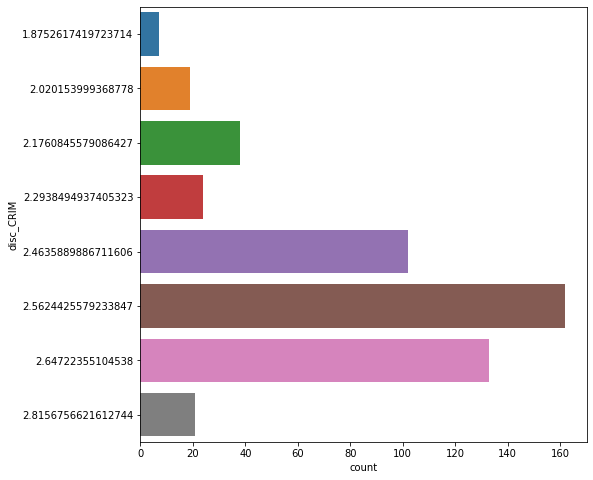

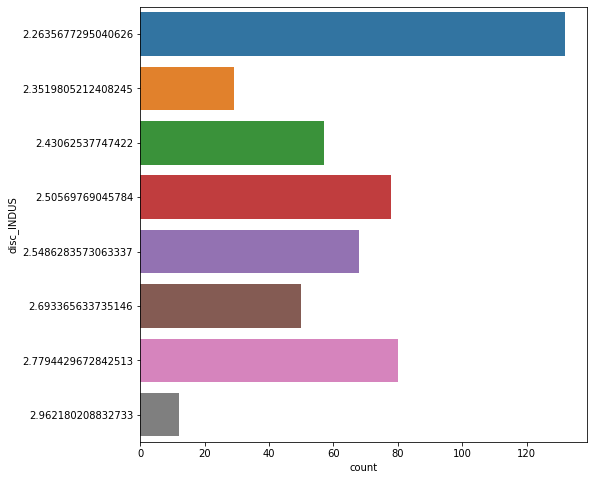

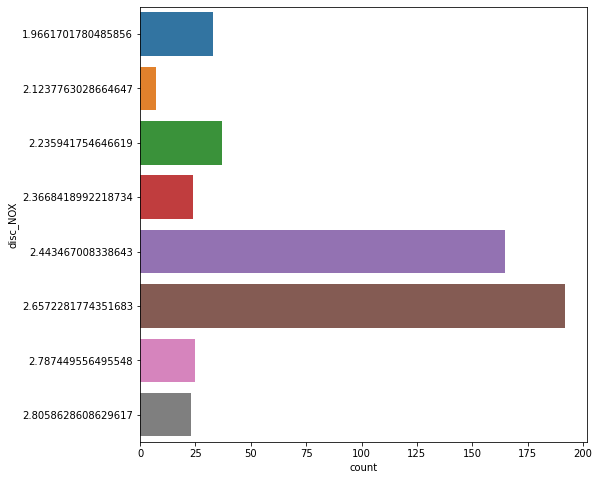

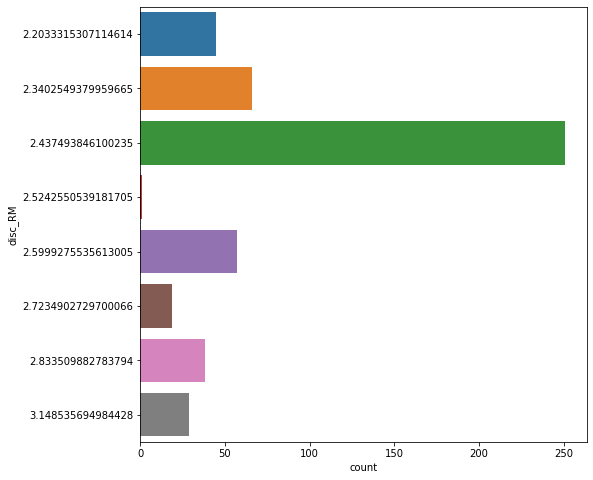

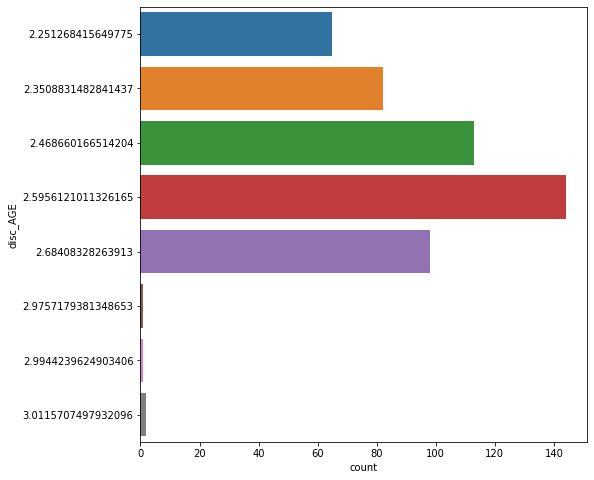

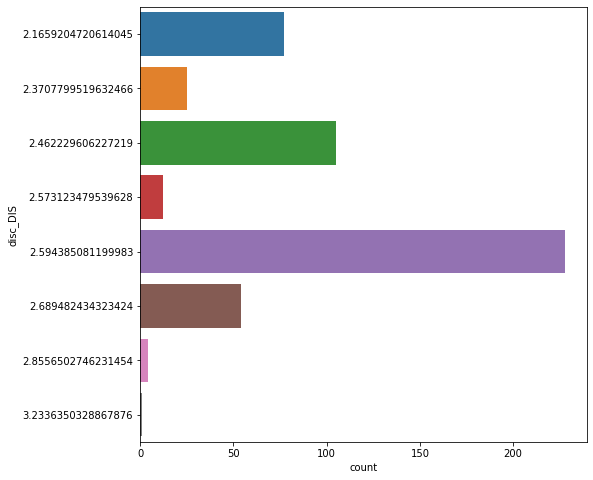

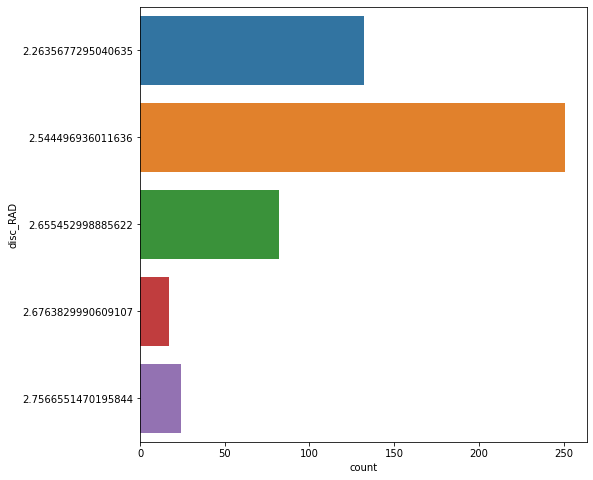

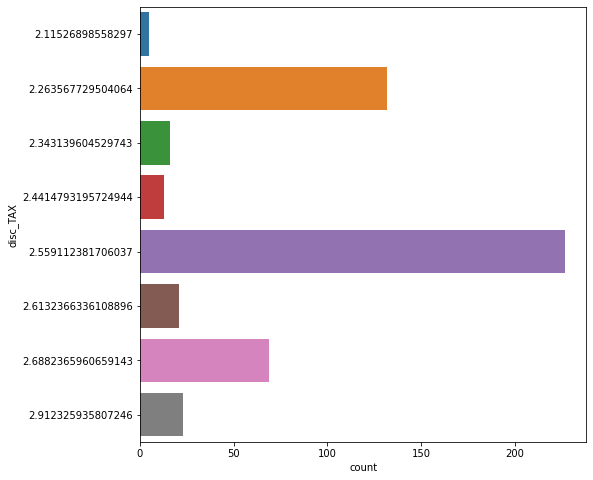

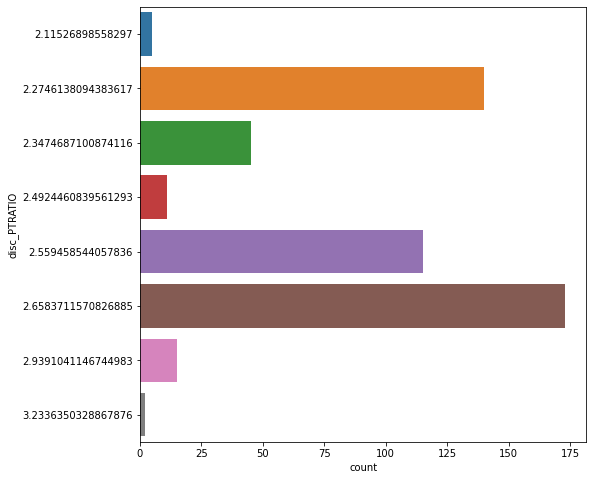

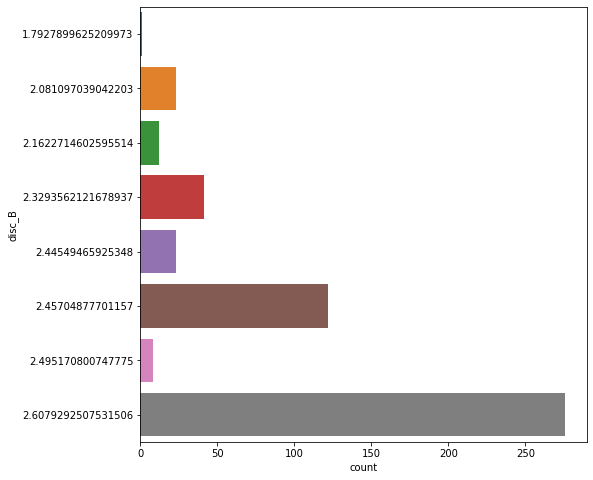

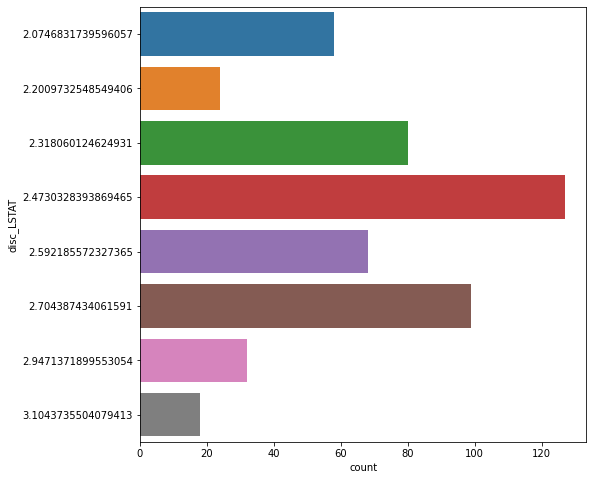

In [ ]:
#Count plots for every attribute.
for i in features:
  plt.figure(figsize=(8,8))
  sns.countplot(y='disc_'+str(i), data=data)

for column= CRIM 

for column= INDUS 

for column= NOX 

for column= RM 

for column= AGE 

for column= DIS 

for column= RAD 

for column= TAX 

for column= PTRATIO 

for column= B 

for column= LSTAT 



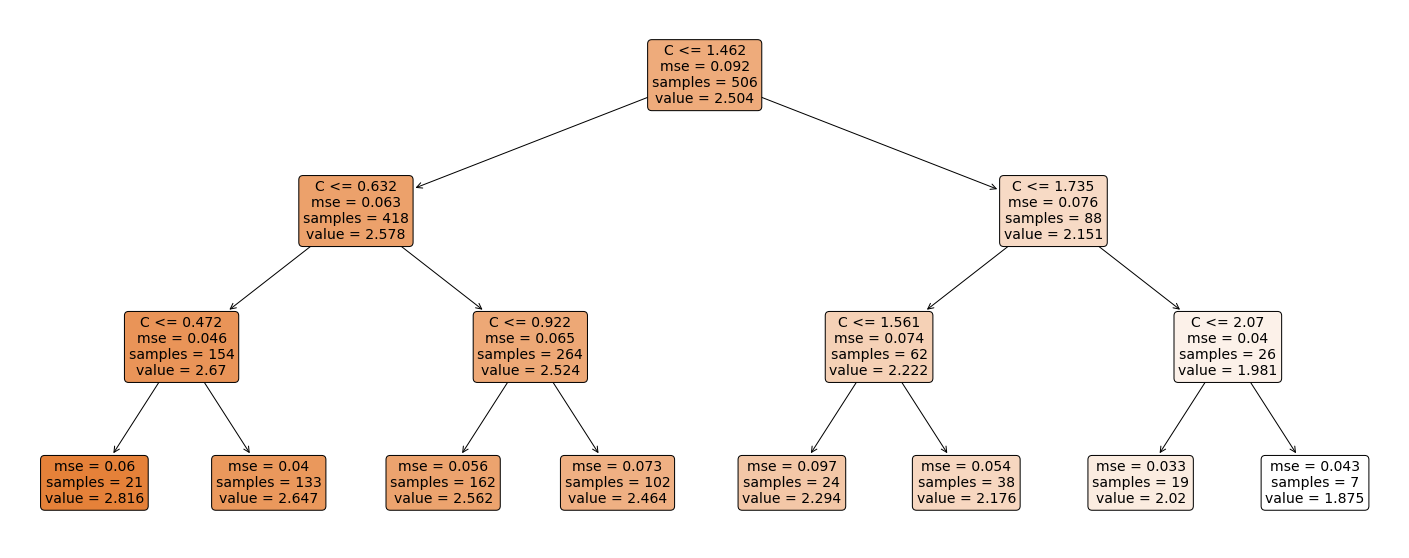

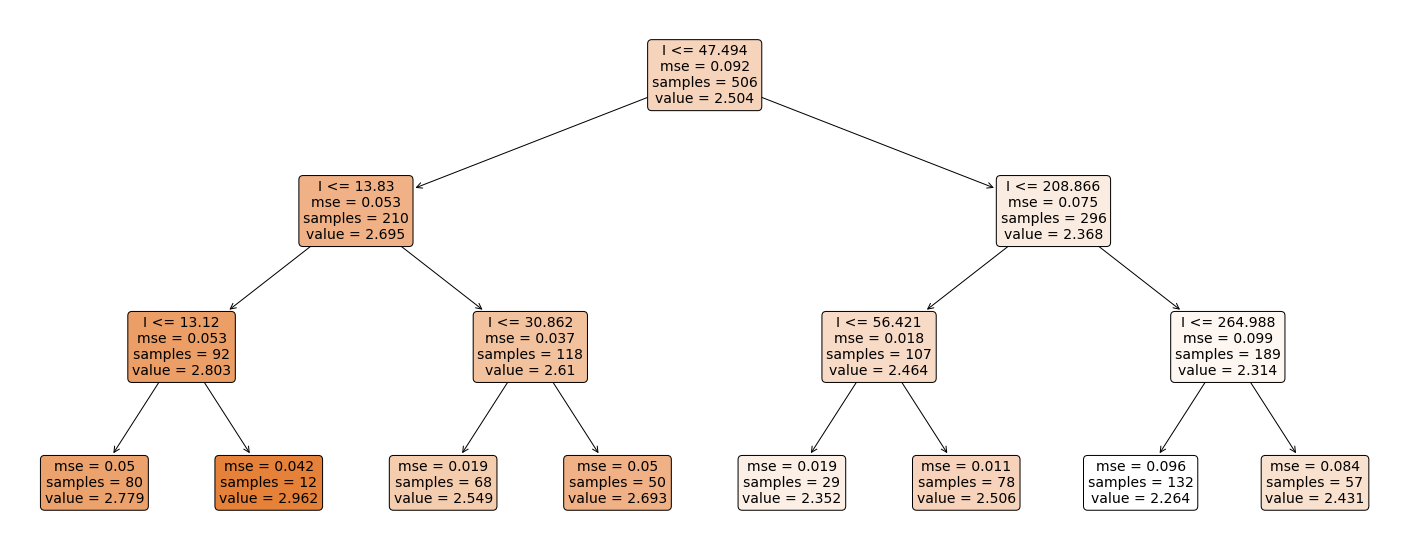

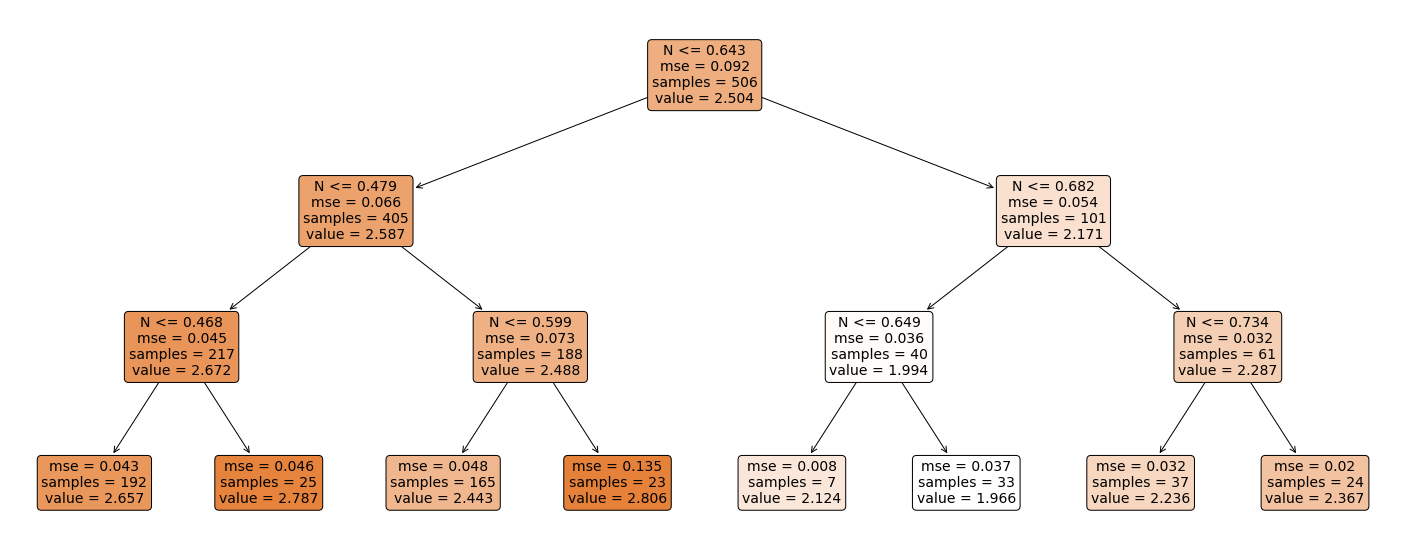

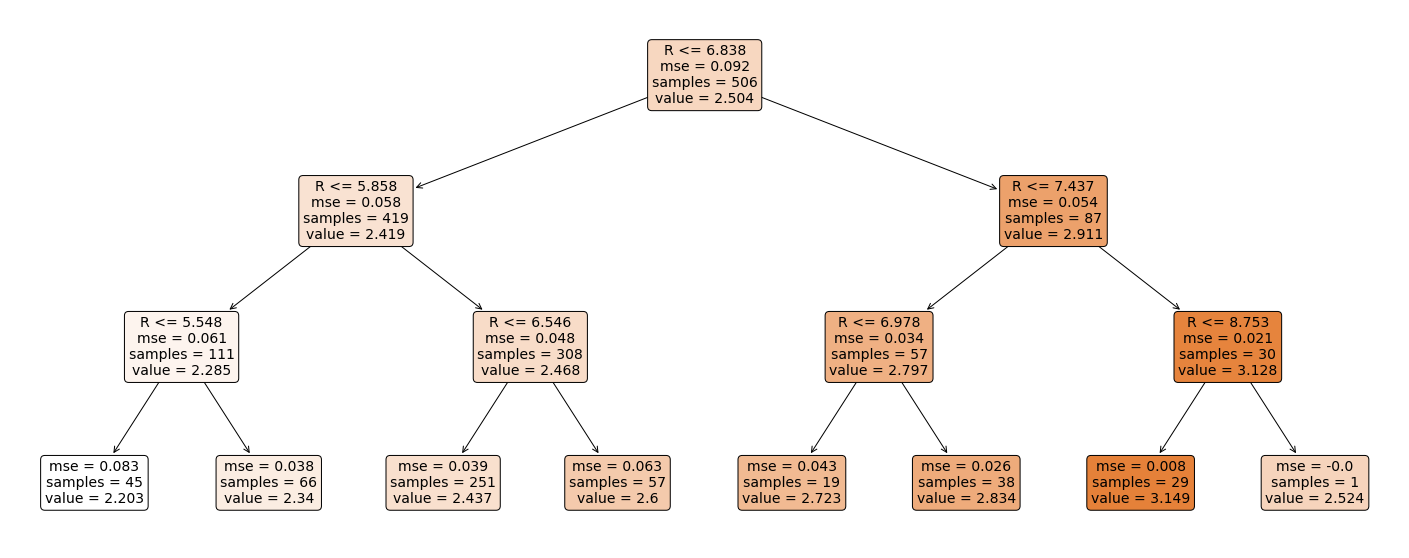

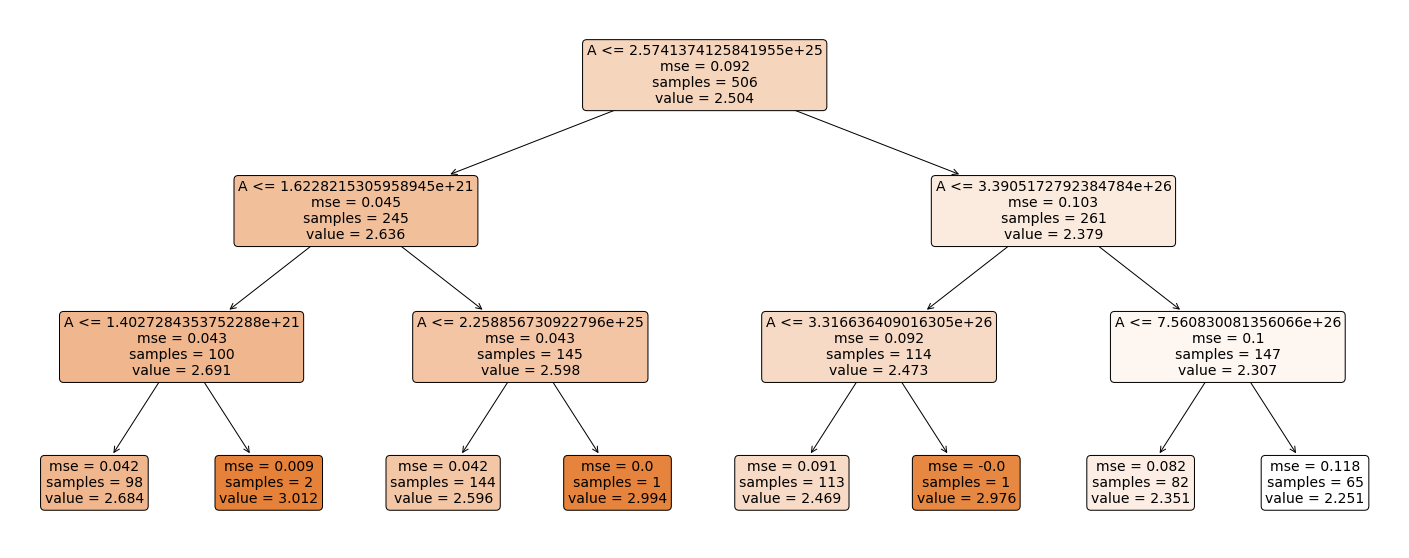

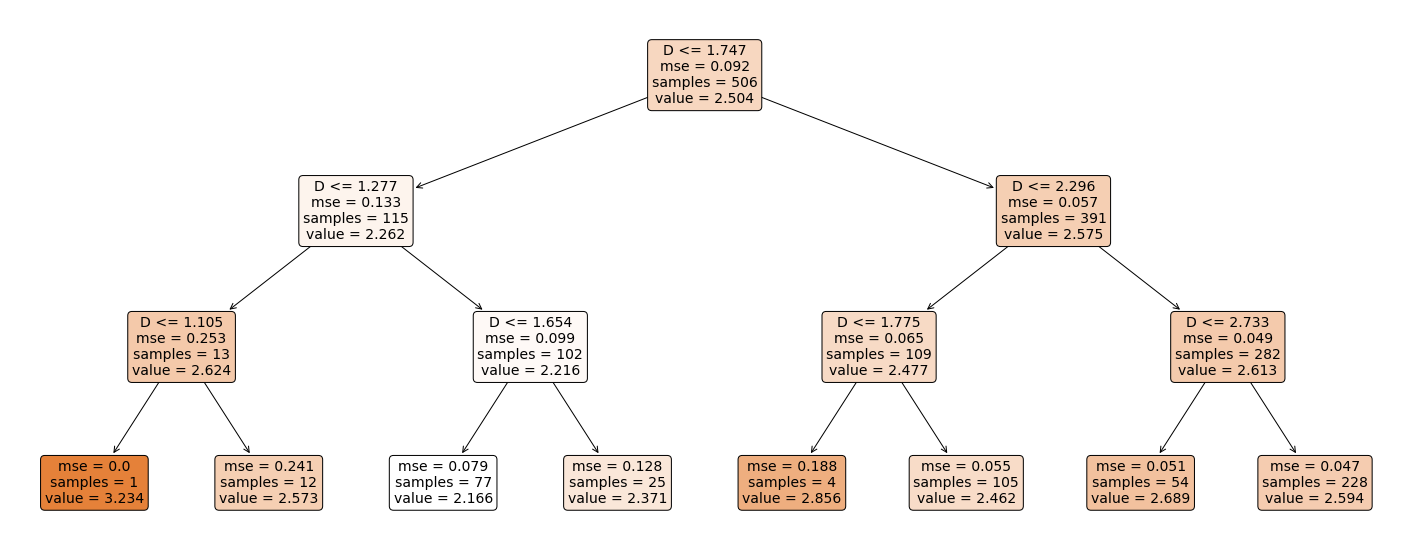

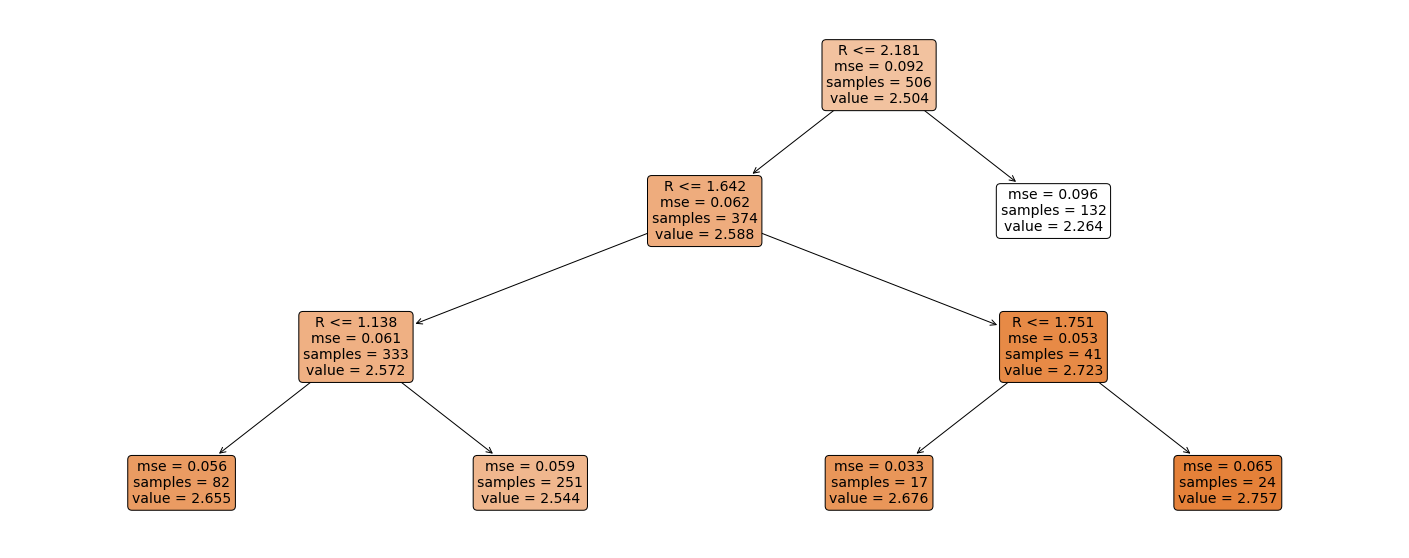

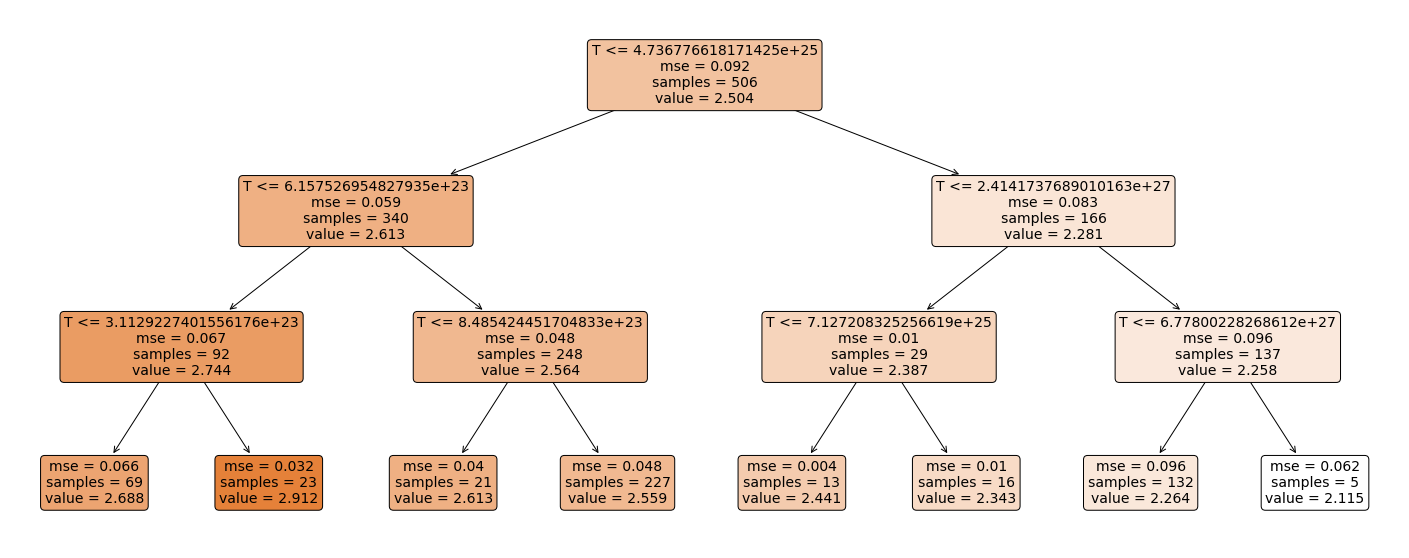

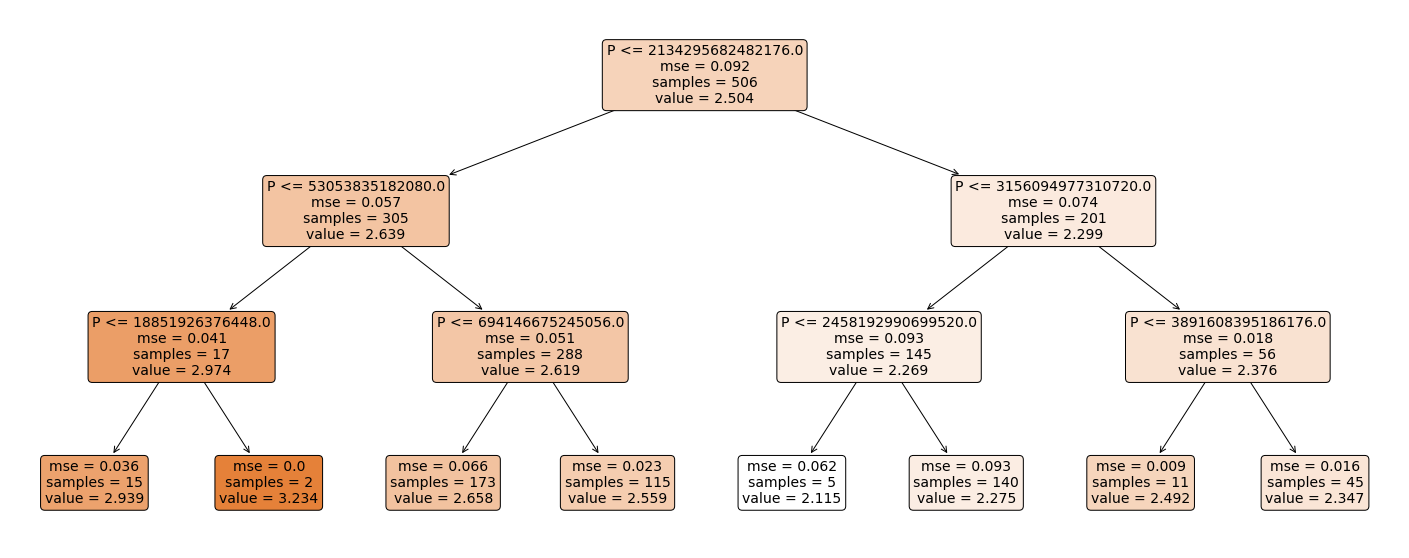

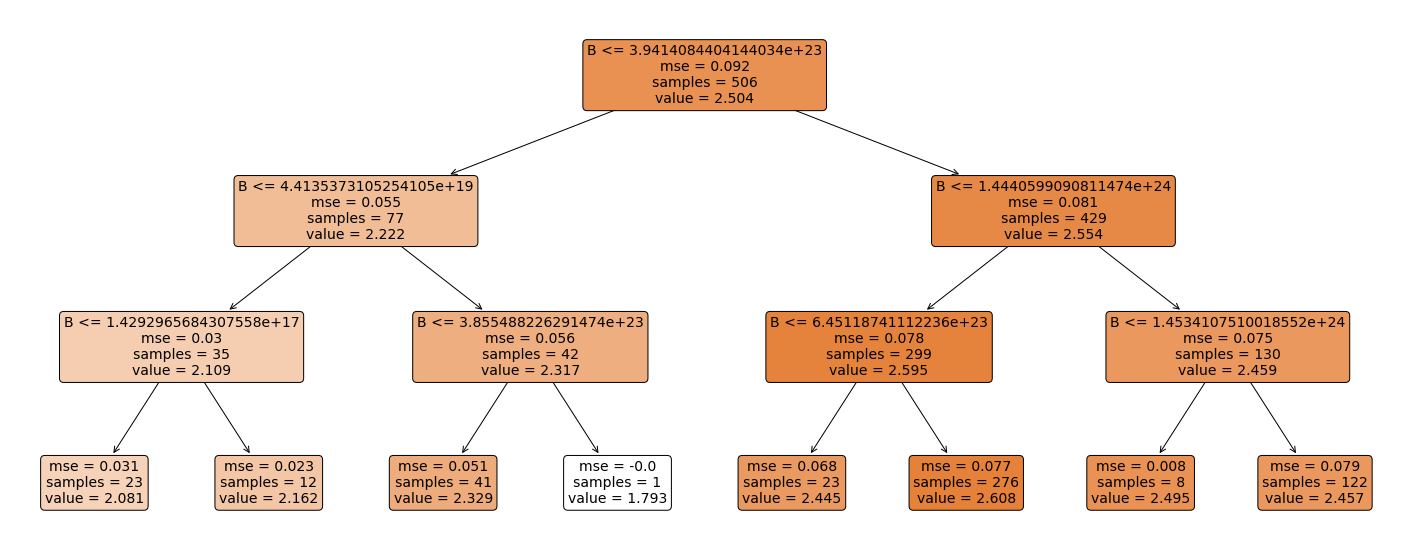

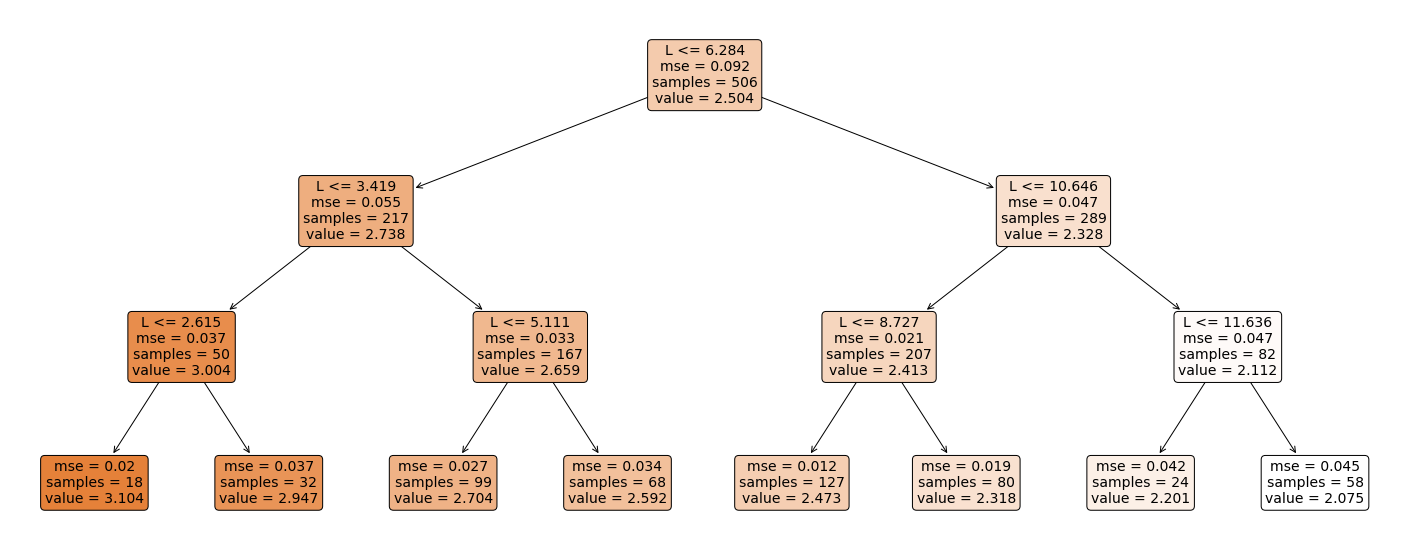

In [ ]:
count=0
for i in features:
  print("for column=",i,'\n')
  plt.figure(figsize=(25,10))
  a = plot_tree(discrete_sets[count], feature_names=i,class_names='MEDV',filled=True,rounded=True,fontsize=14)
  count=count+1

In [ ]:
#finding pearson coefficient
corr=data.corr()
corr

,MEDV,disc_CRIM,disc_INDUS,disc_NOX,disc_RM,disc_AGE,disc_DIS,disc_RAD,disc_TAX,disc_PTRATIO,disc_B,disc_LSTAT
MEDV,1.000000,0.620726,0.642525,0.702849,0.728143,0.499977,0.554283,0.508115,0.587103,0.616498,0.478360,0.844746
disc_CRIM,0.620726,1.000000,0.706512,0.680251,0.328879,0.616365,0.581043,0.761358,0.684885,0.624870,0.486757,0.614065
disc_INDUS,0.642525,0.706512,1.000000,0.699305,0.515559,0.592759,0.460597,0.771510,0.802310,0.802867,0.416152,0.628421
disc_NOX,0.702849,0.680251,0.699305,1.000000,0.354887,0.551273,0.666805,0.663723,0.611101,0.616444,0.407451,0.606619
disc_RM,0.728143,0.328879,0.515559,0.354887,1.000000,0.310512,0.330179,0.320847,0.397249,0.450083,0.256030,0.674366
disc_AGE,0.499977,0.616365,0.592759,0.551273,0.310512,1.000000,0.582590,0.485369,0.506854,0.455916,0.299677,0.608009
disc_DIS,0.554283,0.581043,0.460597,0.666805,0.330179,0.582590,1.000000,0.461635,0.455792,0.379978,0.380131,0.538788
disc_RAD,0.508115,0.761358,0.771510,0.663723,0.320847,0.485369,0.461635,1.000000,0.773444,0.715421,0.437111,0.508558
disc_TAX,0.587103,0.684885,0.802310,0.611101,0.397249,0.506854,0.455792,0.773444,1.000000,0.802492,0.412453,0.554545
disc_PTRATIO,0.616498,0.624870,0.802867,0.616444,0.450083,0.455916,0.379978,0.715421,0.802492,1.000000,0.382082,0.527429


There is no big correlation between class attribute and other attribute even after discretization.